# Лабараторная работа 3
## Доброхотов Виталий 381806-4

Функция имеет вид $$f = \frac{\sin(x)*\sin(y)} {x*y}$$

### Отображение функции и нахождение минимума
Красная стартовая точка, синяя - точка, которую нашел minimize

<IPython.core.display.Javascript object>


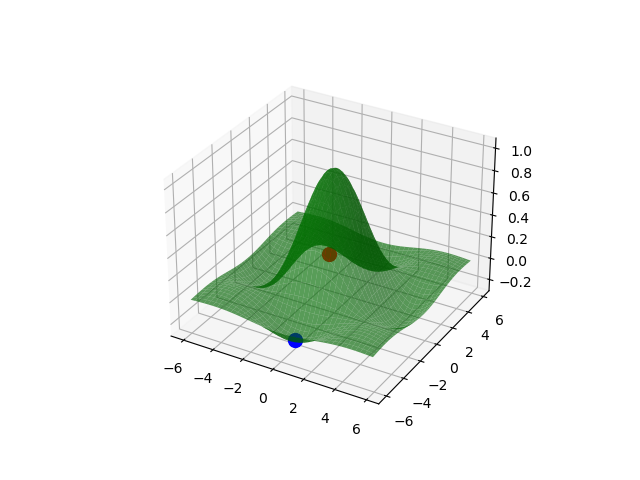

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# #Данная штука позволяет вращать график в jupyter, нужно раскоментить если запускаете с помощью jupyter notebook
%matplotlib notebook

def func_min(point):
    x,y = point
    return (np.sin(x) * np.sin(y)) / (x * y)

def func(x, y):
    return (np.sin(x) * np.sin(y)) / (x * y)

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X,Y = np.meshgrid(x, y)
Z = func(X,Y)
start_point = [0.8, -2]
min = minimize(func_min, x0 = start_point)

ax = plt.axes(projection = "3d")
ax.plot_surface(X, Y, Z, alpha = 0.64, color='green')
ax.scatter(start_point[0], start_point[1], func_min(start_point), color= "red", s= 100, alpha =1)
ax.scatter(min.x[0], min.x[1], func_min(min.x), color= "blue", s= 100, alpha =1)


### Линии уровня

<IPython.core.display.Javascript object>


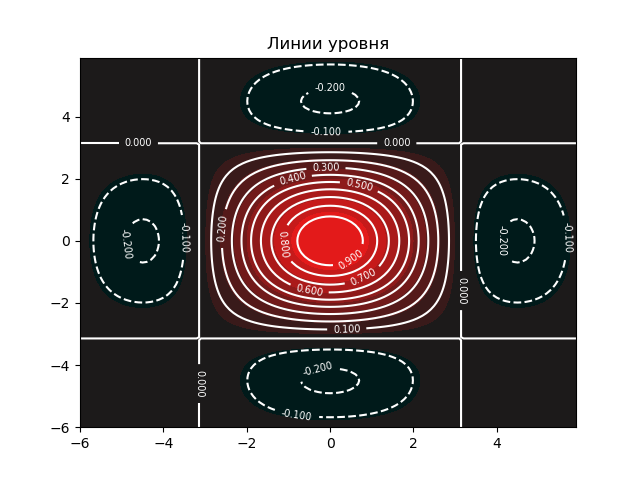

<a list of 21 text.Text objects>

In [3]:

color_level = 10
lvl_region = np.linspace(np.min(Z), np.max(Z),color_level).tolist()
color_fill = np.zeros((color_level, 3))
color_fill[:, 1:] = 0.1
color_fill[:, 0] = np.linspace(0, 1, color_level)

fig, ax = plt.subplots()
plt.title("Линии уровня")
ax.contourf(X, Y, Z,levels = lvl_region, colors = color_fill)
cs = ax.contour(X, Y, Z,12, colors = "white")
ax.clabel(cs,inline = True, colors = "white", fontsize = 7)


### Получение градиента

In [6]:
from sympy import symbols, diff,sin

x, y = symbols("x y")
string_func = ((sin(x) * sin(y)) / (x * y))
df_dx = diff(string_func,x)
df_dy = diff(string_func, y)
print(f"Gradient : \n\tdf\dx = {df_dx}\n\tdf\dy = {df_dy}")

Gradient : 
	df\dx = sin(y)*cos(x)/(x*y) - sin(x)*sin(y)/(x**2*y)
	df\dy = sin(x)*cos(y)/(x*y) - sin(x)*sin(y)/(x*y**2)
